# Import Required Libraries
Import the necessary libraries, including os, pandas, matplotlib, and seaborn.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_38531/2530580355.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Define Function to Calculate Compression Ratio
Define a function that takes the path of the original file and the path of the compressed file, and returns the compression ratio.

In [2]:
def calculate_compression_ratio(original_file, compressed_file):
    original_size = os.path.getsize(original_file)
    compressed_size = os.path.getsize(compressed_file)
    return original_size / compressed_size

# Load and Analyze Files
Use the os library to load the files from the 'compressed/' directory and its subdirectories. Analyze the files to determine their type based on the subdirectory they are in.

In [30]:
# Define the directory path
original_dir_path = '../test/raw/'
directory_path = '../test/compressed/'
results = []

for subdir, dirs, files in os.walk(directory_path):
    if subdir == directory_path:
        continue
       
    for file in files:
        file_path = os.path.join(subdir, file)
        raw_file_path = file_path.replace('compressed/', 'raw/')
        raw_file_path = raw_file_path.replace('.bin', '.txt')
        compression_ratio = calculate_compression_ratio(file_path, raw_file_path)
        
        original_size = os.path.getsize(raw_file_path)
        compressed_size = os.path.getsize(file_path)
        original_filename = raw_file_path.split('/')[-1]
        num_chars = original_filename.split('_')[2].split('.')[0]
        octets = original_filename.split('_')[1]
        results.append({
            'compressed': file,
            'original': original_filename,
            'octets': octets,
            'compressed_size': compressed_size,
            'original_size': original_size,
            'num_chars': num_chars,
            'type': subdir.split('/')[-1],
            'compression_ratio': compression_ratio,
            'compression_efficiency': (original_size - compressed_size) / original_size * 100,
        })

df = pd.DataFrame(results)

In [31]:
df.shape

(80, 9)

In [32]:
df.head()

,compressed,original,octets,compressed_size,original_size,num_chars,type,compression_ratio,compression_efficiency
0,normal_5000000_94.bin,normal_5000000_94.txt,5000000,3672375,4999948,94,normal,0.734483,26.551736
1,normal_50000_94.bin,normal_50000_94.txt,50000,38464,49950,94,normal,0.770050,22.994995
2,normal_100000_94.bin,normal_100000_94.txt,100000,75204,99956,94,normal,0.752371,24.762896
3,normal_10000000_94.bin,normal_10000000_94.txt,10000000,7342836,9999952,94,normal,0.734287,26.571288
4,normal_50000000_16.bin,normal_50000000_16.txt,50000000,20467223,49999992,16,normal,0.409345,59.065547


# Visualize Compression Ratios
Use matplotlib and seaborn to visualize the compression ratios, with different types of files represented by different colors.

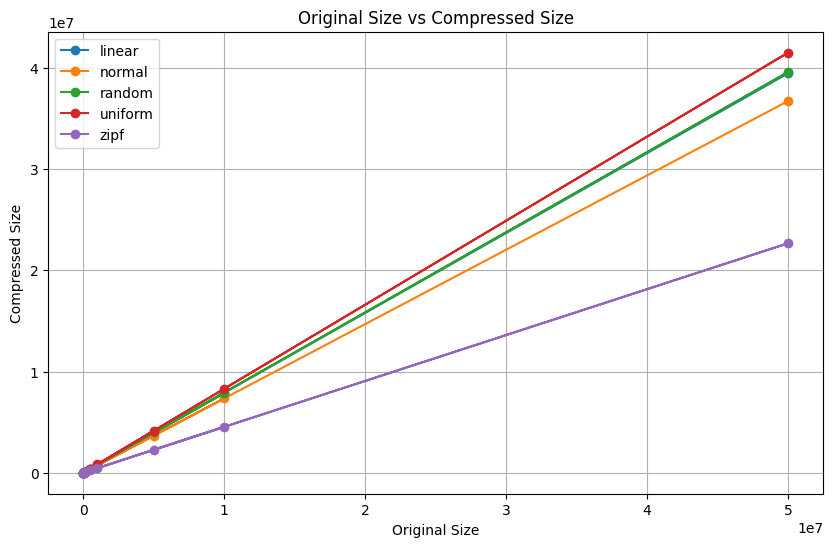

In [18]:
plt.figure(figsize=(10, 6))
grouped_df = df[df['num_chars'] == '94'].groupby('type')

for group_name, group_df in grouped_df:
    df_type = group_df
    plt.plot(df_type['original_size'], df_type['compressed_size'], '-o', label=group_name)  # Add label parameter
    plt.xlabel('Original Size')
    plt.ylabel('Compressed Size')
    plt.title('Original Size vs Compressed Size')
    plt.grid(True)
    plt.legend() 

plt.show()

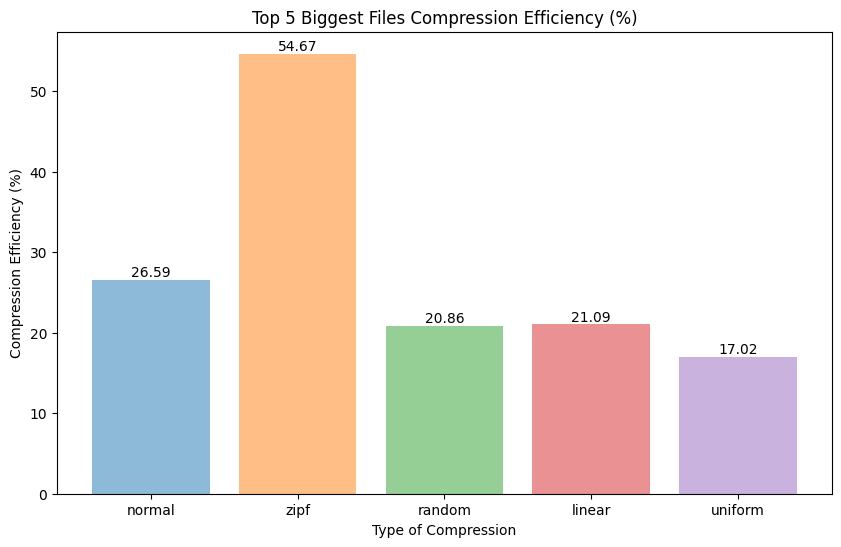

In [21]:
sorted_df = df[df['num_chars'] == '94'].sort_values(by='original_size')
biggest_files_df = sorted_df.sort_values(by='original_size', ascending=False).head(5)

plt.figure(figsize=(10, 6))
for index, row in biggest_files_df.iterrows():
    plt.bar(row['type'], row['compression_efficiency'], alpha=0.5)
    plt.text(row['type'], row['compression_efficiency'], round(row['compression_efficiency'], 2), ha='center', va='bottom')

plt.xlabel('Type of Compression')
plt.ylabel('Compression Efficiency (%)')
plt.title('Top 5 Biggest Files Compression Efficiency (%)')
plt.show()


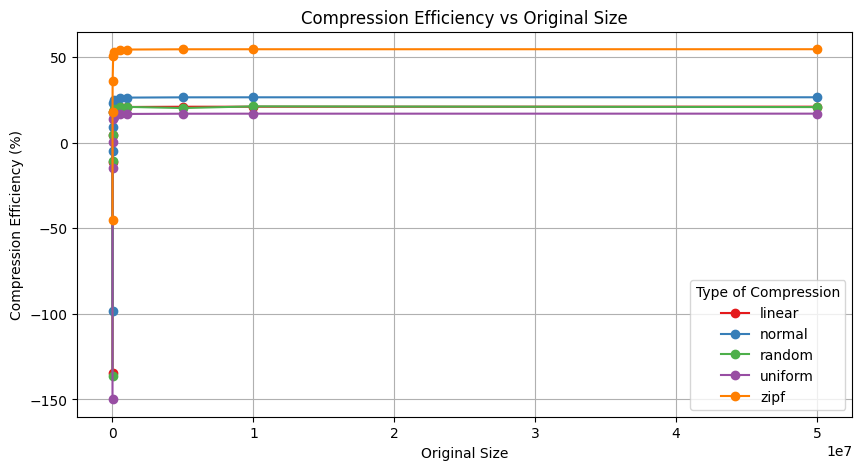

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each type of compression
color_palette = sns.color_palette('Set1', n_colors=len(df['type'].unique()))

# Plot the evolution of compression efficiency over original size
plt.figure(figsize=(10, 5))

# Group DataFrame by type of compression
grouped_df = df[df['num_chars'] == '94'].groupby('type')

# Iterate over groups and plot data
for i, (group_name, group_df) in enumerate(grouped_df):
    # Sort the DataFrame by original size
    group_df = group_df.sort_values(by='original_size')
    # Plot the data
    plt.plot(group_df['original_size'], group_df['compression_efficiency'], 
             linestyle='-', marker='o', markersize=6, color=color_palette[i], label=group_name)

# Set labels and title
plt.xlabel('Original Size')
plt.ylabel('Compression Efficiency (%)')
plt.title('Compression Efficiency vs Original Size')
plt.grid(True)
plt.legend(title='Type of Compression')

plt.show()

In [33]:
df_sorted = df.sort_values(by=['type', 'original_size'])
df_sorted.head(20)

,compressed,original,octets,compressed_size,original_size,num_chars,type,compression_ratio,compression_efficiency
28,linear_1000_94.bin,linear_1000_94.txt,1000,2238,954,94,linear,2.345912,-134.591195
30,linear_5000_94.bin,linear_5000_94.txt,5000,5509,4953,94,linear,1.112255,-11.225520
21,linear_10000_94.bin,linear_10000_94.txt,10000,9504,9953,94,linear,0.954888,4.511203
25,linear_50000_94.bin,linear_50000_94.txt,50000,41104,49952,94,linear,0.822870,17.713004
31,linear_100000_94.bin,linear_100000_94.txt,100000,80605,99952,94,linear,0.806437,19.356291
27,linear_500000_94.bin,linear_500000_94.txt,500000,396256,499947,94,linear,0.792596,20.740398
23,linear_1000000_94.bin,linear_1000000_94.txt,1000000,790821,999949,94,linear,0.790861,20.913867
20,linear_5000000_94.bin,linear_5000000_94.txt,5000000,3946974,4999953,94,linear,0.789402,21.059778
24,linear_10000000_94.bin,linear_10000000_94.txt,10000000,7892153,9999953,94,linear,0.789219,21.078099
19,linear_50000000_94.bin,linear_50000000_94.txt,50000000,39453229,49999952,94,linear,0.789065,21.093466


In [75]:
df_filtered = df[df['octets'].astype(int) == 50000000]
df_filtered.loc[:, 'num_chars'] = df_filtered['num_chars'].astype(int)  # Use .loc to modify the original DataFrame
df_filtered = df_filtered.sort_values(by='num_chars') 

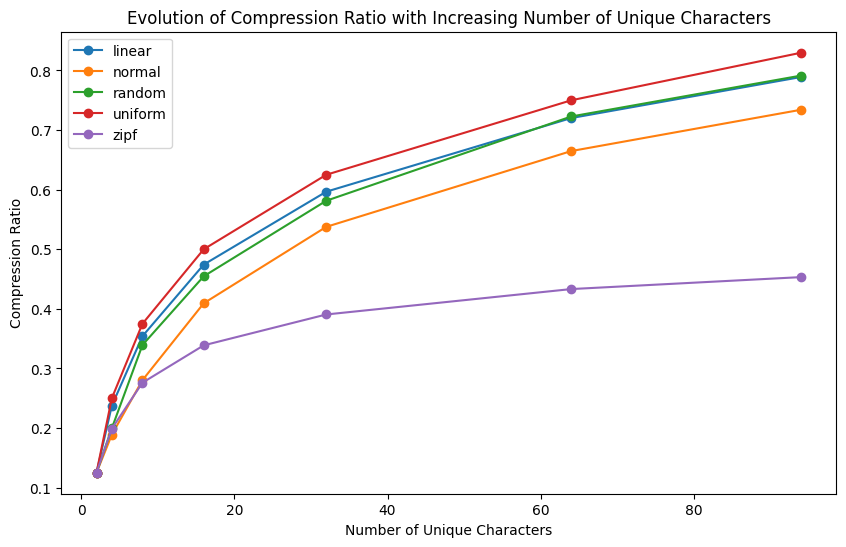

In [95]:
plt.figure(figsize=(10, 6))
for compression_type, group in df_filtered.groupby('type'):
    plt.plot(group['num_chars'], group['compression_ratio'], marker='o', label=compression_type)

plt.xlabel('Number of Unique Characters')
plt.ylabel('Compression Ratio')
plt.title('Evolution of Compression Ratio with Increasing Number of Unique Characters')
plt.legend()

plt.show()


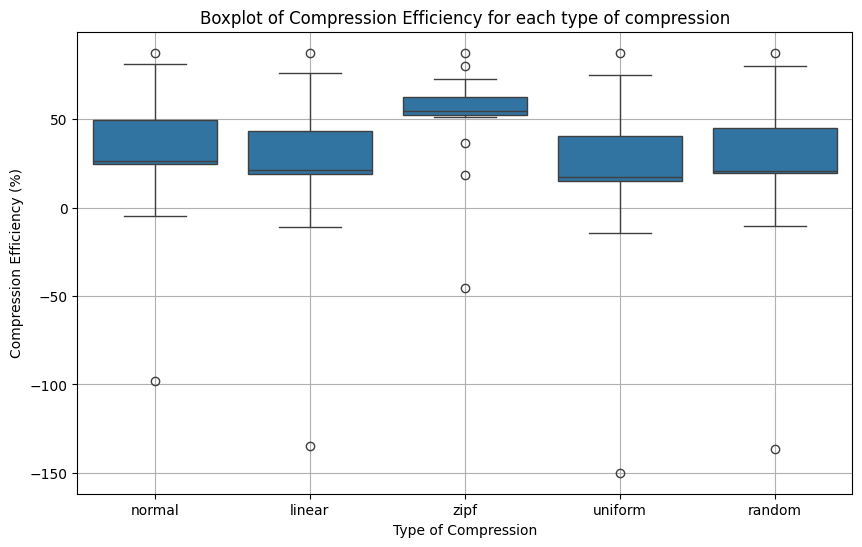

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='compression_efficiency')
plt.xlabel('Type of Compression')
plt.ylabel('Compression Efficiency (%)')
plt.title('Boxplot of Compression Efficiency for each type of compression')
plt.grid(True)
plt.show()